In [1]:
# A linear regression learning algorithm example using TensorFlow library.

# Author: Aymeric Damien
# Project: https://github.com/aymericdamien/TensorFlow-Examples/

In [2]:
import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
rng = numpy.random
%matplotlib inline

In [3]:
# 학습을 위한 파라미터 셋팅; 학습률, 학습 횟수, 50회 학습마다 학습 결과 제시
learning_rate = 0.01
training_epochs = 1000
display_step = 50

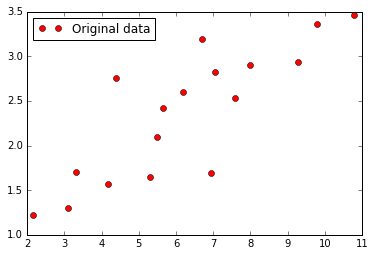

In [4]:
# 학습용 데이터
train_X = numpy.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = numpy.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]

# 그래프
plt.plot(train_X, train_Y, 'ro', label='Original data')
plt.legend(loc='upper left')

In [5]:
# training data를 넣을 수 있는 공간 확보; placeholder (크기 미지정)
X = tf.placeholder("float")
Y = tf.placeholder("float")

# 변수 셋팅; weight, bias
# random하게 initial value 지정
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

In [6]:
# X*W+b 형태의 LR model, 즉 activation fn 없이 summation을 출력하는 SLP
pred = tf.add(tf.mul(X, W), b)

In [7]:
# L2 cost function(MSE)
# reduce_sum = input tensor의 dimension을 줄여 summation
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)

# Gradient descent optimazer 이용
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [8]:
# 변수 초기화
init = tf.initialize_all_variables()

Epoch: 0050 cost= 0.301299989 W= 0.514319 b= -1.10295
Epoch: 0100 cost= 0.275390357 W= 0.498575 b= -0.989687
Epoch: 0150 cost= 0.252471685 W= 0.483767 b= -0.883158
Epoch: 0200 cost= 0.232199401 W= 0.469839 b= -0.782965
Epoch: 0250 cost= 0.214268312 W= 0.45674 b= -0.688732
Epoch: 0300 cost= 0.198407367 W= 0.44442 b= -0.600102
Epoch: 0350 cost= 0.184378237 W= 0.432833 b= -0.516745
Epoch: 0400 cost= 0.171969056 W= 0.421935 b= -0.438345
Epoch: 0450 cost= 0.160993040 W= 0.411685 b= -0.364607
Epoch: 0500 cost= 0.151284650 W= 0.402045 b= -0.295255
Epoch: 0550 cost= 0.142697543 W= 0.392978 b= -0.230028
Epoch: 0600 cost= 0.135102212 W= 0.38445 b= -0.168681
Epoch: 0650 cost= 0.128384188 W= 0.376429 b= -0.110981
Epoch: 0700 cost= 0.122442149 W= 0.368886 b= -0.0567138
Epoch: 0750 cost= 0.117186546 W= 0.361791 b= -0.00567377
Epoch: 0800 cost= 0.112538099 W= 0.355118 b= 0.0423307
Epoch: 0850 cost= 0.108426712 W= 0.348842 b= 0.0874802
Epoch: 0900 cost= 0.104790337 W= 0.342939 b= 0.129944
Epoch: 0950 

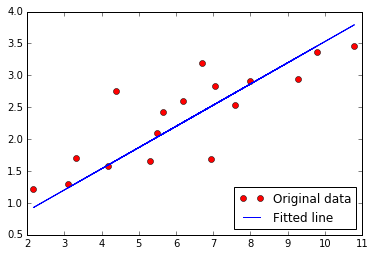

In [9]:
# 텐서플로우의 모든 operation은 session위에서 돌아갑니다.
with tf.Session() as sess:
    # 초기화 op 실행
    sess.run(init)

    # 미리 만들어 놓은 X, Y라는 placeholder를 key로 이용해 train_X, train_Y 데이터들을 삽입
    # 1000번 학습
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        # cost, W, b가 어떻게 변화하는지 학습 50번마다 표시 
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print "Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b)

    
    # 학습이 끝난 뒤 최종 cost, W, b
    print "Optimization Finished!"
    training_cost = c
    print "Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n'

    # original data와 학습 결과(WX+b)를 함께 plotting
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend(loc=4)
    plt.show()